[[580. 512.]
 [605. 510.]
 [624. 511.]
 [646. 511.]
 [663. 512.]
 [675. 515.]
 [694. 514.]]
lArrayNeg:  [1.04997726 1.05294884 1.05578416 1.05849083 1.06120665 1.06372875
 1.06632597 1.06881699 1.07179053 1.07402305 1.07625038 1.07845734
 1.08034344 1.08216475 1.08379846 1.08540098 1.08680702 1.08875434
 1.09057017 1.09165765 1.09278966 1.09391917 1.09494286 1.09609407
 1.09712846 1.09809649 1.09885158 1.09954346 1.10033978 1.1003029
 1.09989885 1.09932322 1.09909024 1.09923524 1.09963394]
rArrayNeg:  [0.03996017 0.04375023 0.04755437 0.05137148 0.05520734 0.05905073
 0.06291543 0.06679085 0.06907406 0.07296325 0.07686674 0.08078329
 0.08468909 0.08860169 0.09250988 0.09642555 0.10033737 0.10430517
 0.10660744 0.11050986 0.11442317 0.11834268 0.12225679 0.1261912
 0.13011821 0.13404271 0.13794557 0.14184382 0.14408579 0.14789228
 0.15164608 0.15537098 0.15913962 0.16296075 0.16681937]
xiPrimeNegarray [-13.38214416 -13.03132851 -12.64330984 -12.22613577 -11.82037896
 -11.37375074 -10.95

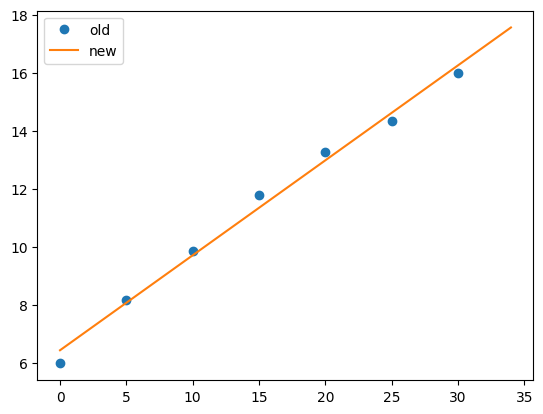

<Figure size 640x480 with 0 Axes>

In [6]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import cm
import mplcursors
from helper_funcs import *
from scipy import signal
from scipy.optimize import curve_fit
from scipy.optimize import fsolve


epsilonArray = np.load('output/outputEpsilon.npy')
xiPrimeNegArray = np.load('output/outputXiNeg.npy')
xiPrimePosArray = np.load('output/outputXiPos.npy')
centerArray = np.load('output/outputCenter.npy',allow_pickle=True)
print(centerArray)
radiusArray = np.load('output/outputRadius.npy')

rArrayPos = np.zeros(len(centerArray))
rArrayNeg = np.zeros(len(centerArray))

lArrayPos = np.zeros(len(centerArray))
lArrayNeg = np.zeros(len(centerArray))

epsilonPrimeArray = np.zeros(len(centerArray))

for i in range(len(centerArray)):

    xValue, yValue = centerArray[i][0], centerArray[i][1]
    xValue = xValue - 512
    yValue = yValue - 512

    xValue = xValue*45/512
    yValue = yValue*45/512

    epsilonPrimeArray[i] = np.sqrt(xValue**2 + yValue**2)

def linearFunc( x, m, b):
    return m*x + b

parameters, covariance = curve_fit(linearFunc, np.arange(15,50,5), epsilonPrimeArray)
epsilonPrimeArrayNew = linearFunc(np.arange(15,50), *parameters)

plt.figure()
plt.plot(np.arange(0,35,5),epsilonPrimeArray, 'o', label='old')
plt.plot(np.arange(0,35),epsilonPrimeArrayNew, '-', label='new')
plt.legend()
plt.figure()

    
rArrayNeg = np.zeros(len(epsilonPrimeArrayNew))
rArrayPos = np.zeros(len(epsilonPrimeArrayNew))
lArrayNeg = np.zeros(len(epsilonPrimeArrayNew))
lArrayPos = np.zeros(len(epsilonPrimeArrayNew))

for i in range(len(epsilonPrimeArrayNew)):
    theta = 90 - xiPrimePosArray[i]
    epsilon = epsilonArray[i]
    chi = 180 - epsilon - theta
    s = np.sin(np.deg2rad(theta))/np.sin(np.deg2rad(chi))


    epsilonPrime = epsilonPrimeArrayNew[i]

    r =  s*np.tan(np.deg2rad(epsilon - epsilonPrime))
    rArrayPos[i] = r

    l = np.sqrt(r**2 + s**2)
    lArrayPos[i] = l

for i in range(len(epsilonPrimeArrayNew)):
    theta = 90 - xiPrimeNegArray[i]
    epsilon = epsilonArray[i]
    chi = 180 - epsilon - theta
    s = np.sin(np.deg2rad(theta))/np.sin(np.deg2rad(chi))


    epsilonPrime = epsilonPrimeArrayNew[i]
    
    r =  s*np.tan(np.deg2rad(epsilon - epsilonPrime))
    rArrayNeg[i] = r

    l = np.sqrt(r**2 + s**2)
    lArrayNeg[i] = l









# for i in range(35):
#     surplus = (i - 5*(i // 5))/5

#     lArrayNegNew[i] = lArrayNeg[i//5]*(1 - surplus) + lArrayNeg[i//5 + 1]*(surplus)
#     lArrayPosNew[i] = lArrayPos[i//5]*(1 - surplus) + lArrayPos[i//5 + 1]*(surplus)
print("lArrayNeg: ",lArrayNeg)
print("rArrayNeg: ",rArrayNeg)
print("xiPrimeNegarray", xiPrimeNegArray)

print("lArrayPos: ",lArrayPos)
print("rArrayPos: ",rArrayPos)
print("xiPrimePosarray", xiPrimePosArray)

print("epsilonArray: ", epsilonArray)


In [7]:
def trueXi(l, r, xiPrime, epsilon):
    

    d = np.sqrt(l**2 + 1 - 2*l*np.cos(np.deg2rad(epsilon)))

    chiPrime = np.rad2deg(np.arccos((l**2 + d**2 - 1)/(2*l*d)))

    
    func = lambda xi :  -xiPrime + xi + r/(r+d)*(180 - chiPrime- np.rad2deg(np.arccos(r/l)))
    sol = fsolve(func, xiPrime)

    print("d: ", d)
    print("l: ", l)
    print("r: ", r)
    print("epsilon: ", epsilon)
    print("xiPrime: "   , xiPrime)
    print("func(sol) = " , func(sol))
    print("xi: ", sol)
    if(xiPrime == sol):
        return np.nan
    return sol



xiNegarray = np.zeros(35)
xiPosarray = np.zeros(35)

print("xiPrimeNegArray: ", xiPrimeNegArray)
print("xiPrimePosArray: ", xiPrimePosArray)

for i in range(35):
    if np.isnan(xiPrimeNegArray[i]) or np.isnan(xiPrimePosArray[i]):
        xiNegarray[i] = np.nan
        xiPosarray[i] = np.nan
        continue
    xiNegarray[i] = trueXi(lArrayNeg[i], rArrayNeg[i], xiPrimeNegArray[i], epsilonPrimeArrayNew[i])
    xiPosarray[i] = trueXi(lArrayPos[i], rArrayPos[i], xiPrimePosArray[i], epsilonPrimeArrayNew[i])

print("xiNegarray: ", xiNegarray)
print("xiPosarray: ", xiPosarray)

xiPrimeNegArray:  [-13.38214416 -13.03132851 -12.64330984 -12.22613577 -11.82037896
 -11.37375074 -10.95597098 -10.52194387 -10.37884547  -9.8983011
  -9.42870735  -8.96591612  -8.45276964  -7.94094071  -7.4087577
  -6.88477318  -6.34062751  -5.89688837  -5.57866787  -5.01677487
  -4.47483876  -3.94455738  -3.41060118  -2.9050716   -2.39340471
  -1.88260686  -1.35404739  -0.82750429  -0.43964583   0.1570724
   0.78454365   1.41860296   2.00110248   2.53107297   3.02495158]
xiPrimePosArray:  [30.60870666 31.31257851 31.97924734 32.61676077 33.26569146 33.87375074
 34.51065848 35.13131887 35.86712672 36.44126985 37.0263636  37.61825987
 38.15980089 38.70265946 39.22516395 39.75586693 40.26686415 40.87779877
 41.43847371 41.9312559  42.44399566 42.96839078 43.48911166 44.0382597
 44.58127092 45.12515163 45.65127117 46.17940745 46.67044877 47.12841058
 47.55561971 47.97624106 48.44842251 48.97313325 49.53393612]
d:  0.12536598821747658
l:  1.049977262855971
r:  0.039960166883256466
epsilon

In [8]:
maxImages = 20

posCoef = np.polyfit(np.arange(0,maxImages),xiPosarray[:maxImages],1)
print("pos m: ", posCoef[0])
print("pos b: ", posCoef[1])

posMean = np.mean(xiPosarray[:maxImages])
print("pos mean: ", posMean)
print("pos sigma:", np.std(xiPosarray[:maxImages]))



negCoef = np.polyfit(np.arange(0,maxImages),xiNegarray[:maxImages],1)
print("neg m: ", negCoef[0])
print("neg b: ", negCoef[1])

negMean = np.mean(xiNegarray[:maxImages])
print("neg mean: ", np.mean(negMean))
print("neg sigma:", np.std(xiNegarray[:maxImages]))

pos m:  0.6468478247174769
pos b:  37.261475375599325
pos mean:  43.40652971041535
pos sigma: 3.742627472290456
neg m:  0.267551326309147
neg b:  -20.98997207557657
neg mean:  -18.448234475639676
neg sigma: 1.57308458111079


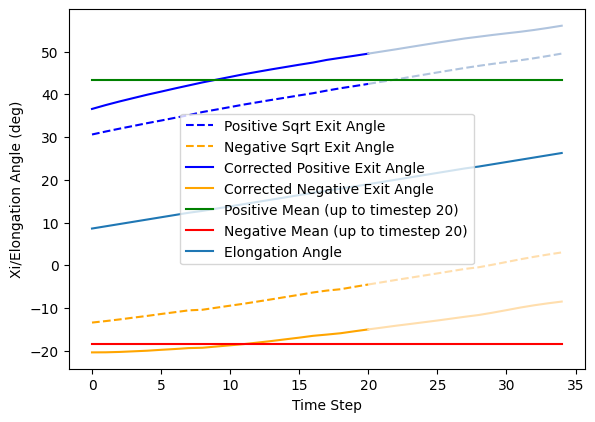

In [9]:
fig, axs = plt.subplots(figsize=(10/1.5,7/1.5))   
axs.plot(np.arange(0,35)[:maxImages+1],xiPrimePosArray[:maxImages+1], label='Positive Sqrt Exit Angle', color='blue', linestyle='dashed')
axs.plot(np.arange(0,35)[:maxImages+1],xiPrimeNegArray[:maxImages+1], label='Negative Sqrt Exit Angle', linestyle='dashed', color='orange') 
axs.plot(np.arange(0,35)[:maxImages+1],xiPosarray[:maxImages+1], label='Corrected Positive Exit Angle', linestyle='solid', color='blue')
axs.plot(np.arange(0,35)[:maxImages+1],xiNegarray[:maxImages+1], label='Corrected Negative Exit Angle', linestyle='solid', color='orange')

axs.plot(np.arange(0,35)[maxImages:],xiPrimePosArray[maxImages:], color='lightsteelblue', linestyle='dashed')
axs.plot(np.arange(0,35)[maxImages:],xiPrimeNegArray[maxImages:], linestyle='dashed', color='navajowhite') 
axs.plot(np.arange(0,35)[maxImages:],xiPosarray[maxImages:], linestyle='solid', color='lightsteelblue')
axs.plot(np.arange(0,35)[maxImages:],xiNegarray[maxImages:], linestyle='solid', color='navajowhite')

axs.plot(np.arange(0,35), np.full(35, posMean), label='Positive Mean (up to timestep 20)', color='green')
axs.plot(np.arange(0,35), np.full(35, negMean), label='Negative Mean (up to timestep 20)', color='red')
axs.plot(epsilonArray, label='Elongation Angle')
axs.set_ylabel('Xi/Elongation Angle (deg)')
axs.set_xlabel('Time Step')
axs.legend(loc='best') 
plt.show()

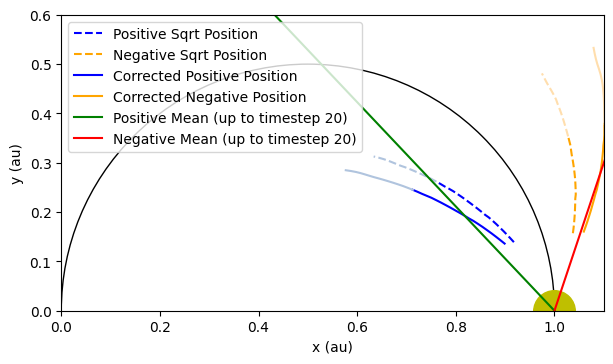

In [10]:
def calculatePositions(array, epsilonArray):
    positionArray = np.zeros((len(array),2))
    for i in range(len(array)):
        xi = array[i]
        epsilon = epsilonArray[i]
        cotXi = 1/np.tan(np.radians(xi))
        # print("cotXi = ", cotXi)
        tanE = np.tan(np.radians(epsilon))
        # print("tanE = ", tanE)
        x = cotXi/(tanE + cotXi)
        y = tanE*x
        positionArray[i] = np.array([x,y])
    
    return positionArray


fig, axs = plt.subplots(1,1, figsize=(7,7))
axs.plot(1,0, 'yo', markersize=30)

posPositionArray = calculatePositions(xiPrimePosArray, epsilonArray)
negPositionArray = calculatePositions(xiPrimeNegArray, epsilonArray)
posPositionArrayAdj = calculatePositions(xiPosarray, epsilonArray)
negPositionArrayAdj = calculatePositions(xiNegarray, epsilonArray)

np.save("output_compare_data/posPositionArrayNosub.npy", posPositionArray)
np.save("output_compare_data/negPositionArrayNosub.npy", negPositionArray)
np.save("output_compare_data/posPositionArrayAdjNosub.npy", posPositionArrayAdj)
np.save("output_compare_data/negPositionArrayAdjNosub.npy", negPositionArrayAdj)


axs.plot(posPositionArray[:maxImages+1,0],posPositionArray[:maxImages+1,1],color='blue', label='Positive Sqrt Position', linestyle='dashed')
axs.plot(negPositionArray[:maxImages+1,0],negPositionArray[:maxImages+1,1],color='orange', label='Negative Sqrt Position', linestyle='dashed')
axs.plot(posPositionArrayAdj[:maxImages+1,0],posPositionArrayAdj[:maxImages+1,1],color='blue', label='Corrected Positive Position', linestyle='solid')
axs.plot(negPositionArrayAdj[:maxImages+1,0],negPositionArrayAdj[:maxImages+1,1],color='orange', label='Corrected Negative Position', linestyle='solid')

axs.plot(posPositionArray[maxImages:,0],posPositionArray[maxImages:,1],color='lightsteelblue', linestyle='dashed')
axs.plot(negPositionArray[maxImages:,0],negPositionArray[maxImages:,1],color='navajowhite', linestyle='dashed')
axs.plot(posPositionArrayAdj[maxImages:,0],posPositionArrayAdj[maxImages:,1],color='lightsteelblue', linestyle='solid')
axs.plot(negPositionArrayAdj[maxImages:,0],negPositionArrayAdj[maxImages:,1],color='navajowhite', linestyle='solid')


axs.plot([1,1+np.cos(np.deg2rad(posMean+90))],[0,np.sin(np.deg2rad(posMean+90))], color = 'green', label='Positive Mean (up to timestep 20)')
axs.plot([1,1 +np.cos(np.deg2rad(negMean+90))],[0,np.sin(np.deg2rad(negMean+90))], color = 'red', label='Negative Mean (up to timestep 20)')

thomson = plt.Circle((0.5, 0), 0.5, color='k', fill=False)
axs.add_patch(thomson)
axs.set_aspect('equal')
axs.set_ylim(0,0.6)
axs.set_xlim(0,1.1)


axs.set_xlabel('x (au)')
axs.set_ylabel('y (au)')

axs.legend(loc='upper left')

plt.show()
